# Offline Analysis Kafka events

## Json to Dataframe

In [1]:
import pandas as pd   
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
kafka_events = []
for line in open('sample_kafka_gen.json', 'r'):
    kafka_events.append(json.loads(line))

In [3]:
print("the number of events in this sample is : " + str(len(kafka_events)))

the number of events in this sample is : 5733


In [4]:
df_kafka_events = pd.DataFrame(kafka_events)

In [5]:
df_kafka_events.sort_values("timestamp", inplace=True)

In [6]:
df_kafka_events['eventType'].value_counts()

display    4420
click      1313
Name: eventType, dtype: int64

# Nombre Display et Nombre d'id publicitaire

In [7]:
df_kafka_events['impressionId'].value_counts().max()

2

In [8]:
print('nombre impression',len(df_kafka_events['impressionId'].unique()))
print('nombre display',df_kafka_events['eventType'].value_counts()['display'])

nombre impression 4420
nombre display 4420


In [9]:
print('nombre moyen CTR', df_kafka_events['eventType'].value_counts()['click']/df_kafka_events['eventType'].value_counts()['display'])

nombre moyen CTR 0.29705882352941176


In [10]:
df_kafka_events.head(10)

,eventType,uid,timestamp,ip,impressionId
0,display,27240866-b0c0-4227-8ebd-cc0d1dfbe99c,1591264812,223.135.140.156,e8364f11-71da-4da0-8d7f-dafa4ea44ffd
1,display,d6d11014-0c1c-4d46-b944-cf4a6d535d5510,1591264838,238.186.83.58,37e31030-9265-440a-96a4-4df853e16983
2,click,d6d11014-0c1c-4d46-b944-cf4a6d535d5510,1591264838,238.186.83.58,37e31030-9265-440a-96a4-4df853e16983
21,display,5df25e81-a3d8-4e73-acbf-29d64aef66e5,1591264839,219.184.147.61,3bda7969-dbfb-45ae-92b6-248a0a90444a
19,display,a4aaec8f-bd17-49e1-9d31-22276aab220119,1591264839,238.186.83.58,6d40b8d0-5a6a-4b6e-ad19-13b0e0ce1d30
18,click,9f72ce96-abb8-4eb2-a395-104e6ed2c14218,1591264839,238.186.83.58,0da50736-ab32-4723-89fe-bf4d0fa8e955
17,display,9f72ce96-abb8-4eb2-a395-104e6ed2c14218,1591264839,238.186.83.58,0da50736-ab32-4723-89fe-bf4d0fa8e955
16,click,9ccc3c9e-81e9-4374-af7d-228118d0332817,1591264839,238.186.83.58,c3711b65-6d8f-4c93-a0dd-1a8743d58819
15,display,9ccc3c9e-81e9-4374-af7d-228118d0332817,1591264839,238.186.83.58,c3711b65-6d8f-4c93-a0dd-1a8743d58819
14,click,ce0be3d3-5aa4-4ca1-b107-5403f03cacb916,1591264839,238.186.83.58,47a555a3-17a2-4ffa-a84d-6596109f595b


# Temps avant de cliquer

In [11]:
df_time=df_kafka_events.groupby(['uid','impressionId']).apply(lambda x: x['timestamp'].values)
df_time=pd.DataFrame(df_time)
df=df_time[0].apply(pd.Series)
df = df[df[1].notna()]
df['time_bef_click']=df[1]-df[0]
df_time_bef_click=df.groupby('uid')['time_bef_click'].agg([np.min, np.max, np.mean])

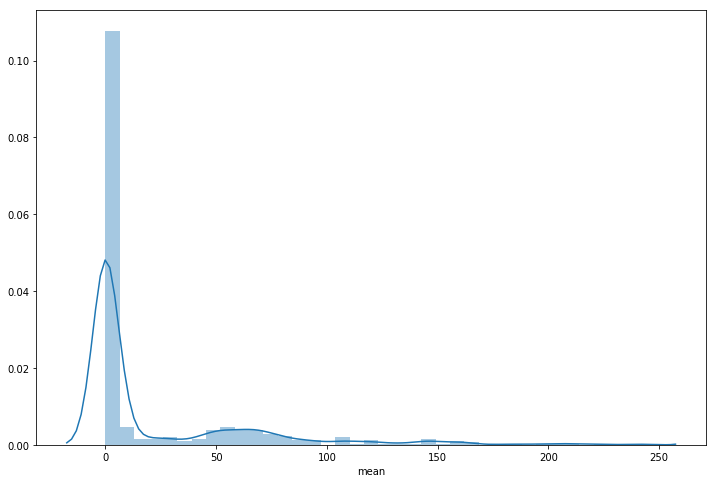

In [13]:
plt.figure(figsize = (12, 8))
sns.distplot(df_time_bef_click['mean'])

In [14]:
df_time=df_kafka_events.groupby(['ip','impressionId']).apply(lambda x: x['timestamp'].values)
df_time=pd.DataFrame(df_time)
df=df_time[0].apply(pd.Series)
df = df[df[1].notna()]
df['time_bef_click']=df[1]-df[0]
df_time_befcli_ip=df.groupby('ip')['time_bef_click'].agg([np.min, np.max, np.mean])

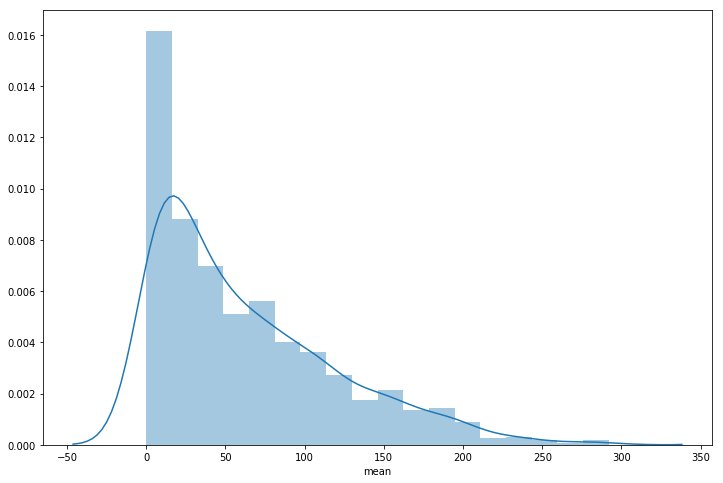

In [15]:
plt.figure(figsize = (12, 8))
sns.distplot(df_time_befcli_ip['mean'])

# CTR

In [16]:
df_ratio=df_kafka_events.groupby(['uid']).eventType.value_counts().unstack(fill_value=0)
df_ratio['ratio']=df_ratio['click']/df_ratio['display']

In [17]:
df_ratio[df_ratio['click']!=0]

eventType,click,display,ratio
uid,,,
005d0dcc-4db6-4e92-9bf4-14f63766ab6d18,1,1,1.000000
00b6bad4-f804-406e-97e7-bc3641ebeede,1,1,1.000000
00e10940-0756-407e-94f3-80ab6457d25114,1,1,1.000000
01a2d25d-8b4c-4672-9426-8a5e95b8dacf12,1,1,1.000000
0234c439-81a9-41cc-8f30-24e244359f1a13,1,1,1.000000
...,...,...,...
fb5814ab-008b-46cd-875b-55a1a1a91c3d,23,54,0.425926
fbb765e3-dfd6-4e86-b98b-6d2f578f91e313,1,1,1.000000
fdc096bd-69d3-44c1-bdde-faed79c3043c,10,36,0.277778


In [18]:
np.histogram(df_ratio['ratio'])

(array([1938,    0,    3,   15,   23,   10,    0,    0,    0,  428],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

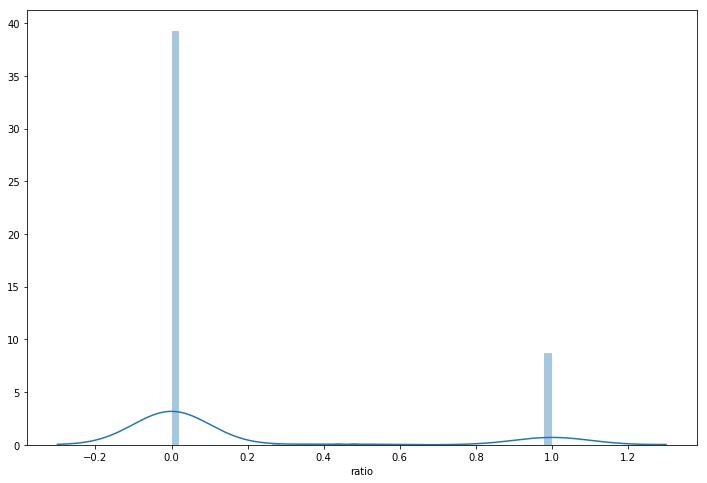

In [24]:
plt.figure(figsize = (12, 8))
sns.distplot(df_ratio['ratio'], kde_kws={'bw':0.1})

In [20]:
df_ratio2=df_kafka_events.groupby(['ip']).eventType.value_counts().unstack(fill_value=0)
df_ratio2['ratio']=df_ratio2['click']/df_ratio2['display']

In [21]:
np.histogram(df_ratio2['ratio'])

(array([2418,    0,    0,   37,    0,  194,    7,    1,    0,  714],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

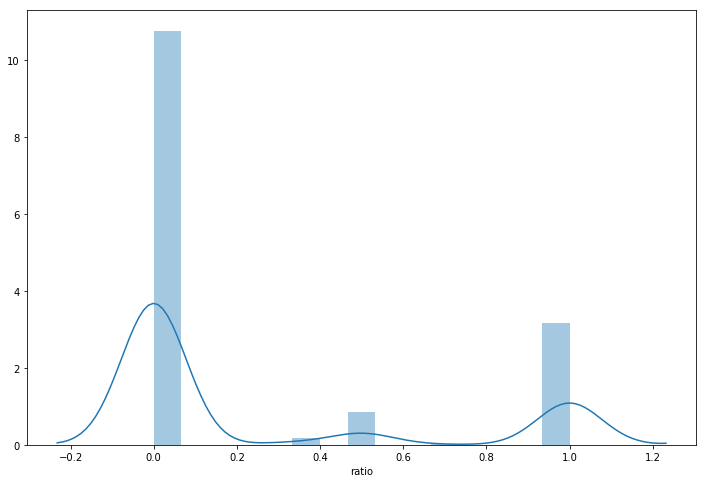

In [23]:
plt.figure(figsize = (12, 8))
sns.distplot(df_ratio2['ratio'])

## Some constants

In [6]:
sliding_window_size = int((df_kafka_events["timestamp"].loc[df_kafka_events.index[5732]]
                       - df_kafka_events["timestamp"].loc[df_kafka_events.index[0]])/5)

In [7]:
sliding_window_size

67

## Simulate a sliding window

In [8]:
time = df_kafka_events["timestamp"].loc[df_kafka_events.index[0]] + sliding_window_size
while time <= df_kafka_events["timestamp"].loc[df_kafka_events.index[5732]]:
    df_temp = df_kafka_events[df_kafka_events["timestamp"]<= time]
    time = time + 1
                                       

## Walk through data

In [8]:
df_uid = df_kafka_events.groupby(["ip", "eventType"]).count()

In [9]:
df_uid.sort_values("impressionId")

uid  timestamp  impressionId
ip              eventType                              
0.100.83.146    display      1          1             1
248.156.163.73  click        1          1             1
                display      1          1             1
248.183.250.209 display      1          1             1
248.184.158.106 display      1          1             1
...                        ...        ...           ...
87.2.36.62      display      4          4             4
169.132.193.24  display      4          4             4
8.246.98.56     display      4          4             4
238.186.83.58   click      320        320           320
                display    320        320           320

[4324 rows x 3 columns]

In [10]:
df_kafka_events.groupby("uid").count()

,eventType,timestamp,ip,impressionId
uid,,,,
000e5d96-81b7-45a6-9679-f170191d29f7,1,1,1,1
001d9e25-a6d6-4bdf-9895-3400e3a33639,1,1,1,1
0034ffa3-d30d-4f3c-87fe-96886216dcf2,1,1,1,1
003a0623-ba8c-45de-9028-8215701194dd,1,1,1,1
003c0678-29d7-40c7-bb12-1d9eb5a1f916,1,1,1,1
...,...,...,...,...
ffaeebac-e9c5-4095-ad88-7dc8430962d0,1,1,1,1
ffcb946b-9c90-42e2-ae76-1ec83243652e,1,1,1,1
ffd82b1d-e947-4f90-9b41-68e6d485409b,2,2,2,2


In [11]:
df_kafka_events["CTR"] = 0
df_kafka_events["Time_bef_click"] = -1

In [12]:
for uid in df_kafka_events['uid'].unique():
    df_temp_uid = df_kafka_events[df_kafka_events["uid"] == uid]
    if len(df_temp_uid["eventType"].unique())>1:
        uid_CTR = df_temp_uid["eventType"].value_counts()["click"]/df_temp_uid["eventType"].value_counts()["display"]
        df_kafka_events.loc[df_kafka_events["uid"]==uid, "CTR"]=uid_CTR
    uid_mean_time_before_click = 0
    nb_click = 0
    for impressionID in df_temp_uid["impressionId"].unique():
        if len(df_temp_uid[df_temp_uid["impressionId"]==impressionID]["eventType"].unique())>1:
            nb_click = nb_click + 1
            time_display = df_temp_uid[(df_temp_uid["impressionId"]==impressionID) & (df_temp_uid["eventType"]=="display")]["timestamp"].values[0]
            time_click = df_temp_uid[(df_temp_uid["impressionId"]==impressionID) & (df_temp_uid["eventType"]=="click")]["timestamp"].values[0]
            uid_mean_time_before_click = uid_mean_time_before_click + (time_click - time_display)
    if nb_click != 0:
        uid_mean_time_before_click = uid_mean_time_before_click/nb_click
        df_kafka_events.loc[df_kafka_events["uid"]==uid, "Time_bef_click"]=uid_mean_time_before_click

In [13]:
df_kafka_events

,eventType,uid,timestamp,ip,impressionId,CTR,Time_bef_click
0,display,27240866-b0c0-4227-8ebd-cc0d1dfbe99c,1591264812,223.135.140.156,e8364f11-71da-4da0-8d7f-dafa4ea44ffd,1.000000,45.000000
1,display,d6d11014-0c1c-4d46-b944-cf4a6d535d5510,1591264838,238.186.83.58,37e31030-9265-440a-96a4-4df853e16983,1.000000,0.000000
2,click,d6d11014-0c1c-4d46-b944-cf4a6d535d5510,1591264838,238.186.83.58,37e31030-9265-440a-96a4-4df853e16983,1.000000,0.000000
21,display,5df25e81-a3d8-4e73-acbf-29d64aef66e5,1591264839,219.184.147.61,3bda7969-dbfb-45ae-92b6-248a0a90444a,0.489362,36.652174
19,display,a4aaec8f-bd17-49e1-9d31-22276aab220119,1591264839,238.186.83.58,6d40b8d0-5a6a-4b6e-ad19-13b0e0ce1d30,1.000000,0.000000
...,...,...,...,...,...,...,...
5713,click,c336f516-c8eb-4bfd-9163-3ee7f084332010,1591265148,238.186.83.58,0c76c32c-c196-4088-a8bf-7382f6bf4005,1.000000,0.000000
5711,display,f2b0c4c6-1b83-4fca-bddc-11729872b6a9,1591265148,194.150.103.68,3722d0a0-6748-4ce6-8264-09d9349b3adc,0.000000,-1.000000
5731,click,d9b873cd-a3fd-4f80-b36d-6647b510cbbb19,1591265148,238.186.83.58,e9dec2de-c245-4add-b7e5-773d8c78d064,1.000000,0.000000
5720,display,a540a60b-d73f-44dd-a8b3-c62d7167103614,1591265148,238.186.83.58,b03acc9d-04ef-4601-9585-62220eaf00a2,1.000000,0.000000


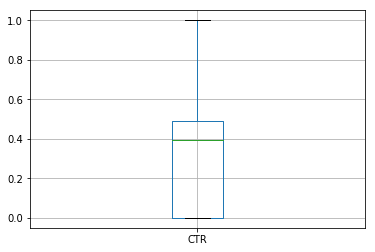

In [14]:
df_kafka_events.boxplot('CTR')

In [15]:
np.histogram(df_kafka_events['CTR'])

(array([1940,    0,  136,  816, 1431,  554,    0,    0,    0,  856],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

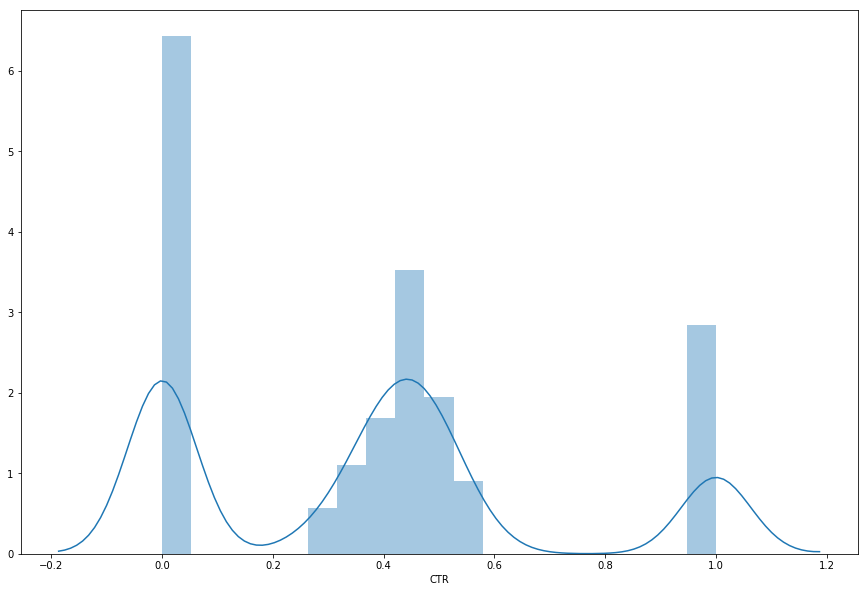

In [16]:
plt.figure(figsize = (15, 10))
sns.distplot(df_kafka_events['CTR'])

In [17]:
np.histogram(df_kafka_events['Time_bef_click'])

(array([2684,  332, 1842,  764,   67,   10,   22,    2,    6,    4],
       dtype=int64),
 array([ -1. ,  23.1,  47.2,  71.3,  95.4, 119.5, 143.6, 167.7, 191.8,
        215.9, 240. ]))

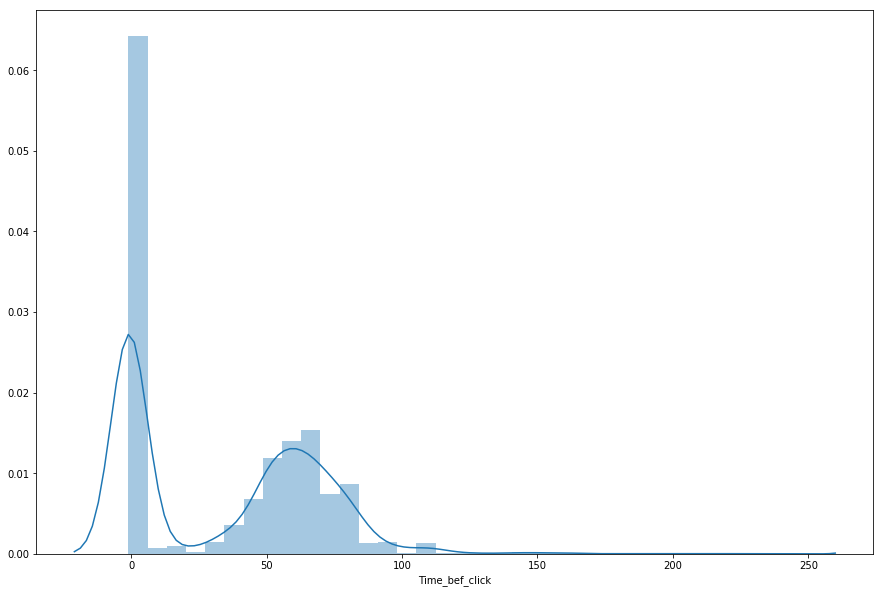

In [18]:
plt.figure(figsize = (15, 10))
sns.distplot(df_kafka_events['Time_bef_click'])

In [17]:
len(df_kafka_events[df_kafka_events["Time_bef_click"]==0]['uid'].unique())

321

In [18]:
len(df_kafka_events['uid'].unique())

2417

In [19]:
df_unique=df_kafka_events.drop_duplicates(subset ="uid") 

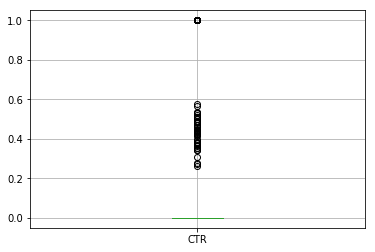

In [20]:
df_unique.boxplot('CTR')

In [21]:
np.histogram(df_unique['CTR'])

(array([1938,    0,    3,   15,   23,   10,    0,    0,    0,  428],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

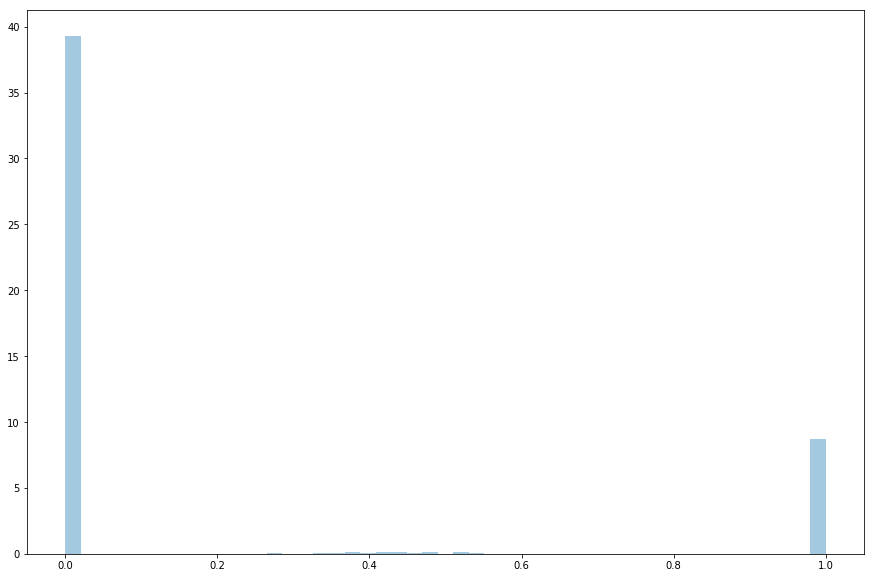

In [22]:
plt.figure(figsize = (15, 10))
sns.distplot(df_unique['CTR'])

In [23]:
np.histogram(df_unique['Time_bef_click'])

(array([2294,   22,   46,   24,    9,    5,   11,    1,    3,    2],
       dtype=int64),
 array([ -1. ,  23.1,  47.2,  71.3,  95.4, 119.5, 143.6, 167.7, 191.8,
        215.9, 240. ]))

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

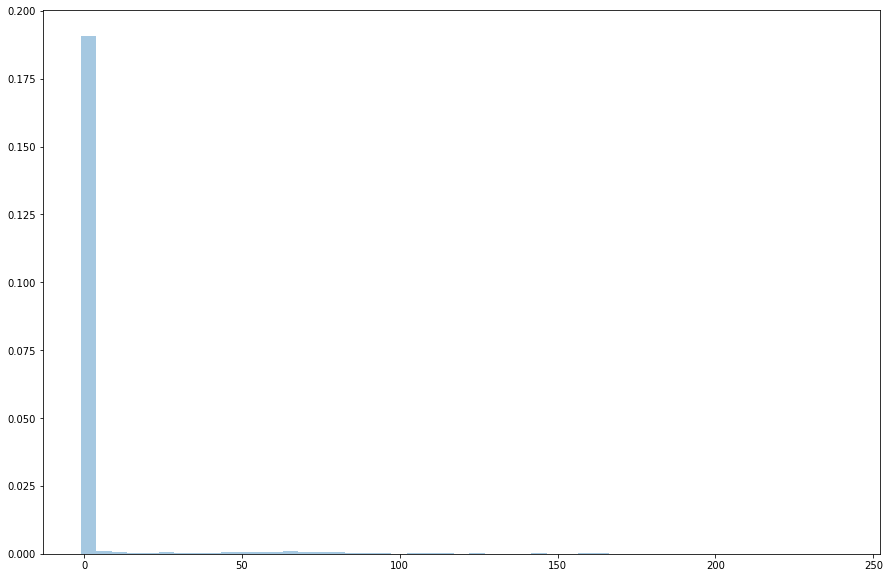

In [24]:
plt.figure(figsize = (15, 10))
sns.distplot(df_unique['Time_bef_click'])

In [14]:
for uid in df_kafka_events['ip'].unique():
    df_temp_uid = df_kafka_events[df_kafka_events["ip"] == uid]
    if len(df_temp_uid["eventType"].unique())>1:
        uid_CTR = df_temp_uid["eventType"].value_counts()["click"]/df_temp_uid["eventType"].value_counts()["display"]
        df_kafka_events.loc[df_kafka_events["ip"]==uid, "CTR"]=uid_CTR
    uid_mean_time_before_click = 0
    nb_click = 0
    for impressionID in df_temp_uid["impressionId"].unique():
        if len(df_temp_uid[df_temp_uid["impressionId"]==impressionID]["eventType"].unique())>1:
            nb_click = nb_click + 1
            time_display = df_temp_uid[(df_temp_uid["impressionId"]==impressionID) & (df_temp_uid["eventType"]=="display")]["timestamp"].values[0]
            time_click = df_temp_uid[(df_temp_uid["impressionId"]==impressionID) & (df_temp_uid["eventType"]=="click")]["timestamp"].values[0]
            uid_mean_time_before_click = uid_mean_time_before_click + (time_click - time_display)
    if nb_click != 0:
        uid_mean_time_before_click = uid_mean_time_before_click/nb_click
        df_kafka_events.loc[df_kafka_events["ip"]==uid, "Time_bef_click"]=uid_mean_time_before_click

In [15]:
df_kafka_events

,eventType,uid,timestamp,ip,impressionId,CTR,Time_bef_click
0,display,27240866-b0c0-4227-8ebd-cc0d1dfbe99c,1591264812,223.135.140.156,e8364f11-71da-4da0-8d7f-dafa4ea44ffd,1.000000,45.0
1,display,d6d11014-0c1c-4d46-b944-cf4a6d535d5510,1591264838,238.186.83.58,37e31030-9265-440a-96a4-4df853e16983,1.000000,0.0
2,click,d6d11014-0c1c-4d46-b944-cf4a6d535d5510,1591264838,238.186.83.58,37e31030-9265-440a-96a4-4df853e16983,1.000000,0.0
21,display,5df25e81-a3d8-4e73-acbf-29d64aef66e5,1591264839,219.184.147.61,3bda7969-dbfb-45ae-92b6-248a0a90444a,1.000000,12.0
19,display,a4aaec8f-bd17-49e1-9d31-22276aab220119,1591264839,238.186.83.58,6d40b8d0-5a6a-4b6e-ad19-13b0e0ce1d30,1.000000,0.0
...,...,...,...,...,...,...,...
5713,click,c336f516-c8eb-4bfd-9163-3ee7f084332010,1591265148,238.186.83.58,0c76c32c-c196-4088-a8bf-7382f6bf4005,1.000000,0.0
5711,display,f2b0c4c6-1b83-4fca-bddc-11729872b6a9,1591265148,194.150.103.68,3722d0a0-6748-4ce6-8264-09d9349b3adc,NaN,NaN
5731,click,d9b873cd-a3fd-4f80-b36d-6647b510cbbb19,1591265148,238.186.83.58,e9dec2de-c245-4add-b7e5-773d8c78d064,1.000000,0.0
5720,display,a540a60b-d73f-44dd-a8b3-c62d7167103614,1591265148,238.186.83.58,b03acc9d-04ef-4601-9585-62220eaf00a2,1.000000,0.0


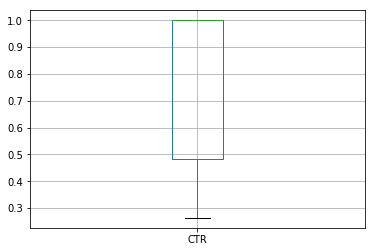

In [16]:
df_kafka_events.boxplot('CTR')

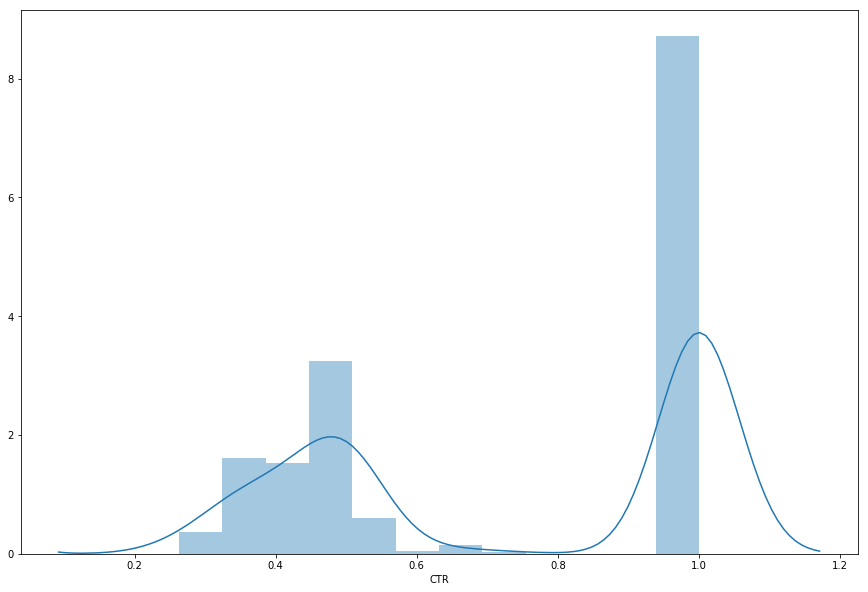

In [17]:
plt.figure(figsize = (15, 10))
sns.distplot(df_kafka_events['CTR'])